<a href="https://colab.research.google.com/github/VivanBhatt/QuantumAlg_HW/blob/main/PHSX801_HW8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pennylane --upgrade

In [2]:
import pennylane as qml
import numpy as np
#import matplotlib.pyplot as plt

**Catch The Phase**

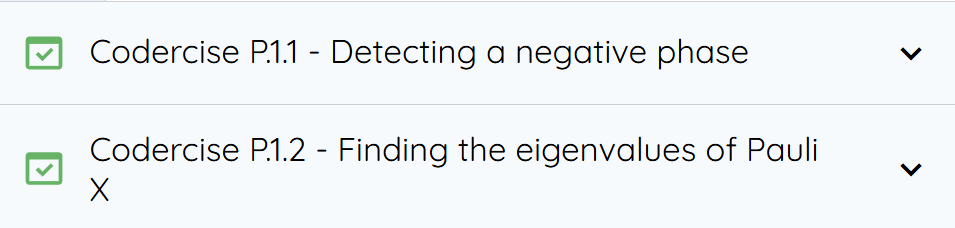

**Q1**

In [3]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def guess_the_unitary(unitary):
    """Given a unitary that performs a Z or a -Z operation
    on a qubit, guess which one it is.

    Args:
        U (array[complex]): A unitary matrix, guaranteed to be either Z or -Z.

    Returns:
        array [int]:  Probabilities on  on the first qubit
        using qml.probs()
    """
    ##################
    # YOUR CODE HERE #
    ##################

    qml.Hadamard(0)
    qml.ControlledQubitUnitary(unitary,0,1)
    qml.Hadamard(0)

    return qml.probs(0)

# Z gate
U1 = qml.PauliZ.compute_matrix()

# -Z gate
U2 = (-1)*qml.PauliZ.compute_matrix()

print(guess_the_unitary(U1))
print(guess_the_unitary(U2))

[1. 0.]
[0. 1.]


**Q2**

In [4]:
dev = qml.device("default.qubit", wires=2)

@qml.qnode(dev)
def phase_kickback_X(eigenvector):
    """ Given an eigenvector of X,
    apply the phase kickback circuit to observe
    the probabilities on the control wire

    Args:
        eigenvector(String): A string "plus" or "minus" depicting
        the eigenvector of X

    Returns:
        array[int]: Measurement outcome on the first qubit using qml.probs()
    """
    # Prepare |ψ>
    ##################
    # YOUR CODE HERE #
    ##################

    if eigenvector == "plus":
        qml.Hadamard(1)
    if eigenvector == "minus":
        qml.X(1)
        qml.Hadamard(1)

    # Phase kickback
    ##################
    # YOUR CODE HERE #
    ##################

    qml.Hadamard(0)
    qml.CNOT([0,1])
    qml.Hadamard(0)

    return qml.probs(wires=[0])

print(phase_kickback_X("plus"))
print(phase_kickback_X("minus"))

# MODIFY EIGENVALUES BELOW
eigenvalue_of_X_plus = 1
eigenvalue_of_X_minus = -1

[1. 0.]
[0. 1.]


**It's not Just a Phase**

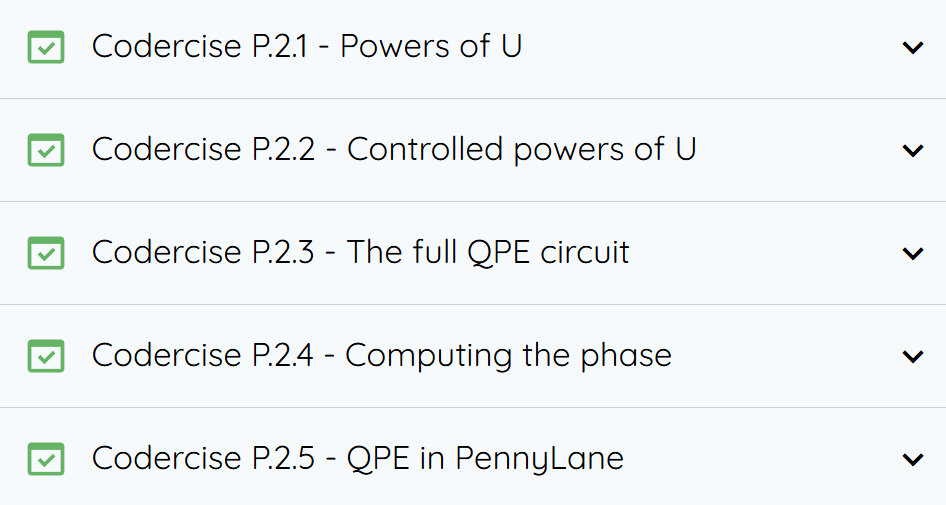

**Q1**

In [5]:
def U_power_2k(unitary, k):
    """ Computes U at a power of 2k (U^2^k)

    Args:
        unitary (array[complex]): A unitary matrix

    Returns:
        array[complex]: the unitary raised to the power of 2^k
    """
    ##################
    # YOUR CODE HERE #
    ##################

    return np.linalg.matrix_power(unitary,2**k)

# Try out a higher power of U
U = qml.T.compute_matrix()
print(U)

U_power_2k(U, 2)

[[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j]]


array([[ 1.+0.0000000e+00j,  0.+0.0000000e+00j],
       [ 0.+0.0000000e+00j, -1.+4.4408921e-16j]])

**Q2**

In [6]:
estimation_wires = [0, 1, 2]
target_wires = [3]

def apply_controlled_powers_of_U(unitary):
    """A quantum function that applies the sequence of powers of U^2^k to
    the estimation wires.

    Args:
        unitary (array [complex]): A unitary matrix
    """

    ##################
    # YOUR CODE HERE #
    ##################
    for i in estimation_wires:
        qml.ControlledQubitUnitary(U_power_2k(unitary,3-1-i),i,3)
    pass

**Q3**

In [7]:
dev = qml.device("default.qubit", wires=4)

estimation_wires = [0, 1, 2]
target_wires = [3]

def prepare_eigenvector():
    qml.PauliX(wires=target_wires)

@qml.qnode(dev)
def qpe(unitary):
    """ Estimate the phase for a given unitary.

    Args:
        unitary (array[complex]): A unitary matrix.

    Returns:
        array[float]: Measurement outcome probabilities on the estimation wires.
    """
    ##################
    # YOUR CODE HERE #
    ##################

    prepare_eigenvector()

    for i in estimation_wires:
        qml.Hadamard(i)

    apply_controlled_powers_of_U(unitary)
    qml.adjoint(qml.QFT(estimation_wires))

    return qml.probs(estimation_wires)

U = qml.T.compute_matrix()
print(qpe(U))

[1.34786749e-32 1.00000000e+00 1.99734725e-32 6.25927232e-33
 3.18110547e-33 1.63704045e-33 6.15415682e-33 5.44075209e-33]


**Q4**

In [8]:
estimation_wires = [0, 1, 2]
target_wires = [3]

def estimate_phase(probs):
    """Estimate the value of a phase given measurement outcome probabilities
    of the QPE routine.

    Args:
        probs (array[float]): Probabilities on the estimation wires.

    Returns:
        float: the estimated phase
    """
    ##################
    # YOUR CODE HERE #
    ##################

    return  np.argmax(probs) * 2 ** (-len(estimation_wires))

U = qml.T.compute_matrix()

probs = qpe(U)


estimated_phase = estimate_phase(probs)
print(estimated_phase)

0.125


**Q5**

In [9]:
dev = qml.device("default.qubit", wires=4)

estimation_wires = [0, 1, 2]
target_wires = [3]

def prepare_eigenvector():
    qml.PauliX(wires=target_wires)

@qml.qnode(dev)
def qpe(unitary):
    """Estimate the phase for a given unitary.

    Args:
        unitary (array[complex]): A unitary matrix.

    Returns:
        array[float]: Probabilities on the estimation wires.
    """

    prepare_eigenvector()

    ##################
    # YOUR CODE HERE #
    ##################

    qml.QuantumPhaseEstimation(unitary,target_wires,estimation_wires)

    return qml.probs(estimation_wires)


U = qml.T.compute_matrix()
probs = qpe(U)
print(estimate_phase(probs))

0.125


**Let's Be Rational**

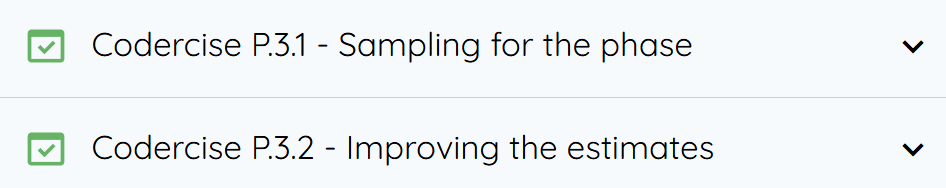

**Q1**

In [10]:
dev = qml.device("default.qubit", wires=10)

def fractional_binary_to_decimal(binary_fraction, wires):
    return float(binary_fraction/ 2 ** len(wires))

@qml.qnode(dev)
def qpe(unitary):
    prepare_eigenvector()
    qml.QuantumPhaseEstimation(unitary,target_wires,estimation_wires)

    return qml.probs(estimation_wires)

def phase_window(probs, estimation_wires):
    """ Given an array of probabilities, return the phase window of the
    unitary's eigenvalue

    Args:
        probs (array[float]): Probabilities on the estimation wires.
        estimation_wires (list[int]): List of estimation wires

    Returns:
        (float, float): the lower and upper bound of the phase
    """

    ##################
    # YOUR CODE HERE #
    ##################

    bound_1 = fractional_binary_to_decimal(np.argmax(probs), estimation_wires) # MOST LIKELY OUTCOME
    bound_2 = fractional_binary_to_decimal(np.argmax(np.delete(probs,np.argmax(probs))), estimation_wires) # SECOND MOST LIKELY OUTCOME

    return (bound_1, bound_2)


# Test your solution

# You can increase the number of estimation wires to a maximum of range(0, 9)
estimation_wires = range(0,9)

# The target is set to the last qubit
target_wires = [9]

# Define the unitary
U = np.array([[1, 0], [0, np.exp((2*np.pi*1j/7))]])

probs = qpe(U)

print(phase_window(probs, estimation_wires))


# MODIFY TO TRUE AFTER TESTING YOUR SOLUTION
done = True

(0.142578125, 0.142578125)


**Q2**

In [11]:
dev = qml.device("default.qubit", wires=10)

def estimates_array(unitary):
    """ Given a unitary, return a list of its phase windows

    Args:
        unitary (array[complex]): A unitary matrix.

    Returns:
        [(float, float)]: a list of phase windows for 2 to 9
        estimation wires
    """

    estimates = []
    target_wires = [9]

    ##################
    # YOUR CODE HERE #
    ##################

    for i in range(2,10):
        estimation_wires=range(0,i)
        probs = qpe(unitary)
        estimates.append(phase_window(probs,estimation_wires))

    return estimates

# Define the unitary
U = np.array([[1, 0], [0, np.exp((2*np.pi*1j/7))]])

estimates_array(U)

###################
# SUBMIT FOR PLOT #
###################

[(18.25, 18.25),
 (9.125, 9.125),
 (4.5625, 4.5625),
 (2.28125, 2.28125),
 (1.140625, 1.140625),
 (0.5703125, 0.5703125),
 (0.28515625, 0.28515625),
 (0.142578125, 0.142578125)]

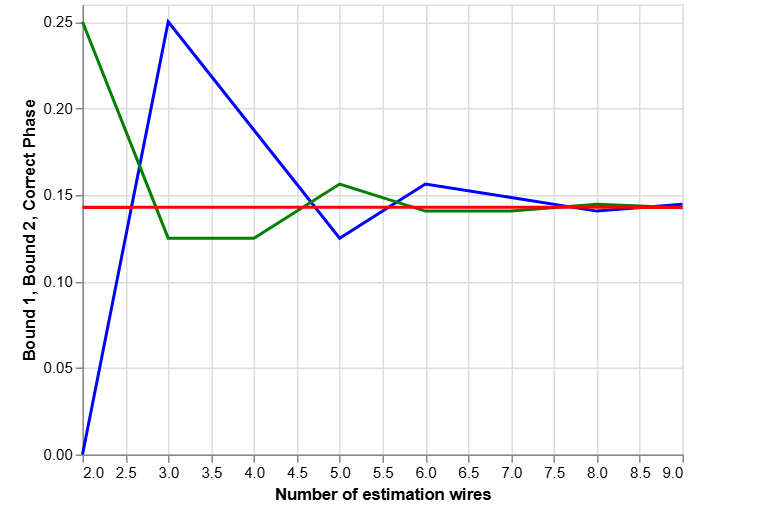

**A Mixed Bag**

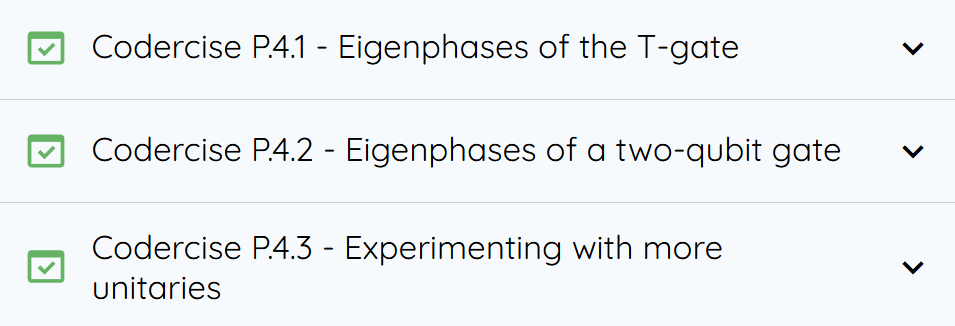

**Q1**

In [12]:
dev = qml.device("default.qubit", wires=5)
estimation_wires = [0, 1, 2]
target_wires = [3]

def prepare_eigenvector_superposition(alpha, beta):
    # Normalize alpha and beta
    norm_squared = np.abs(alpha) ** 2 + np.abs(beta) ** 2
    norm = np.sqrt(norm_squared)
    state = np.array([alpha/norm, beta/norm])

    # Prepare the state
    qml.MottonenStatePreparation(state, wires=target_wires)


@qml.qnode(dev)
def qpe(unitary):
    """Estimate the phase for a given unitary.

    Args:
        unitary (array[complex]): A unitary matrix.

    Returns:
        array[float]: Probabilities on the estimation wires.
    """

    # MODIFY ALPHA, BETA TO PREPARE EIGENVECTOR
    #prepare_eigenvector_superposition(0, 1)
    #prepare_eigenvector_superposition(1, 0)
    prepare_eigenvector_superposition(1/np.sqrt(2), 1/np.sqrt(2))
    # OR UNCOMMENT LINES ABOVE TO PREPARE THE STATE OF YOUR CHOICE

    qml.QuantumPhaseEstimation(
        unitary,
        target_wires=target_wires,
        estimation_wires=estimation_wires,
    )
    return qml.probs(wires=estimation_wires)

U = qml.T.compute_matrix()

probs = qpe(U)

# MODIFY TO TRUE WHEN YOU ARE DONE TESTING
done = True

**Q2**

In [13]:
dev = qml.device("default.qubit", wires=5)
estimation_wires = [0, 1, 2]
target_wires = [3, 4]

def prepare_eigenvector_superposition(alpha, beta, gamma, delta):
    # Normalize alpha, beta, gamma, and delta
    norm_squared = np.abs(alpha) ** 2 + np.abs(beta) ** 2 + np.abs(gamma) ** 2 + np.abs(delta) ** 2
    norm = np.sqrt(norm_squared)
    state = np.array([alpha/norm, beta/norm, gamma/norm, delta/norm])

    #Prepare the state
    qml.MottonenStatePreparation(state, wires=target_wires)


@qml.qnode(dev)
def qpe(unitary):
    """Estimate the phase for a given unitary.

    Args:
        unitary (array[complex]): A unitary matrix.

    Returns:
        array[float]: Probabilities on the estimation wires.
    """

    # PREPARE EIGENVECTOR
    #prepare_eigenvector_superposition(0, 0, 0, 1)
    #prepare_eigenvector_superposition(1, 0, 0, 0)
    prepare_eigenvector_superposition(0.25,0.25,0.25,0.25)


    qml.QuantumPhaseEstimation(
        unitary,
        target_wires=target_wires,
        estimation_wires=estimation_wires,
    )
    return qml.probs(wires=estimation_wires)


U = qml.CZ.compute_matrix()

probs = qpe(U)

# MODIFY TO PROBABILITY OF OBSERVING 100 WHEN ESTIMATION
# WIRES ARE IN EQUAL SUPERPOSITION
probability_100 = 0.25

**Q3**

In [14]:
dev = qml.device("default.qubit", wires=6)
estimation_wires = [0, 1, 2, 3]
target_wires = [4, 5]

def prepare_eigenvector_superposition(alpha, beta, gamma, delta):
    # Normalize alpha, beta, gamma, and delta
    norm_squared = np.abs(alpha) ** 2 + np.abs(beta) ** 2 + np.abs(gamma) ** 2 + np.abs(delta) ** 2
    norm = np.sqrt(norm_squared)
    state = np.array([alpha/norm, beta/norm, gamma/norm, delta/norm])

    # Prepare the state
    qml.MottonenStatePreparation(state, wires=target_wires)


@qml.qnode(dev)
def qpe(unitary):
    """Estimate the phase for a given unitary.

    Args:
        unitary (array[complex]): A unitary matrix.

    Returns:
        probs (array[float]): Probabilities on the estimation wires.
    """

    # MODIFY ALPHA, BETA, GAMMA, DELTA TO PREPARE EIGENVECTOR
    #prepare_eigenvector_superposition(0, 0, 0, 1)
    #prepare_eigenvector_superposition(1, 0, 0, 0)
    #prepare_eigenvector_superposition(0, 1, 0, 0)
    prepare_eigenvector_superposition(0.25,0.25,0.25,0.25)
    # OR UNCOMMENT LINES ABOVE TO PREPARE THE STATE OF YOUR CHOICE

    qml.QuantumPhaseEstimation(
        unitary,
        target_wires=target_wires,
        estimation_wires=estimation_wires,
    )
    return qml.probs(wires=estimation_wires)


# UNCOMMENT THE LINE CORRESPONDING TO THE MATRIX YOU'D LIKE
# TO ESTIMATE PHASES OF
#U = qml.CZ.compute_matrix()
#U = qml.CRZ.compute_matrix(0.4)
#U = qml.CRX.compute_matrix(0.1)
#U = qml.CRot.compute_matrix(0.9, 0.7, 0.4)
U=qml.CRX.compute_matrix(1/3)

probs = qpe(U)

mystery_phase = 0.9375 # MODIFY THIS